Nombre de lignes avant nettoyage: 187
Nombre de lignes après nettoyage: 98


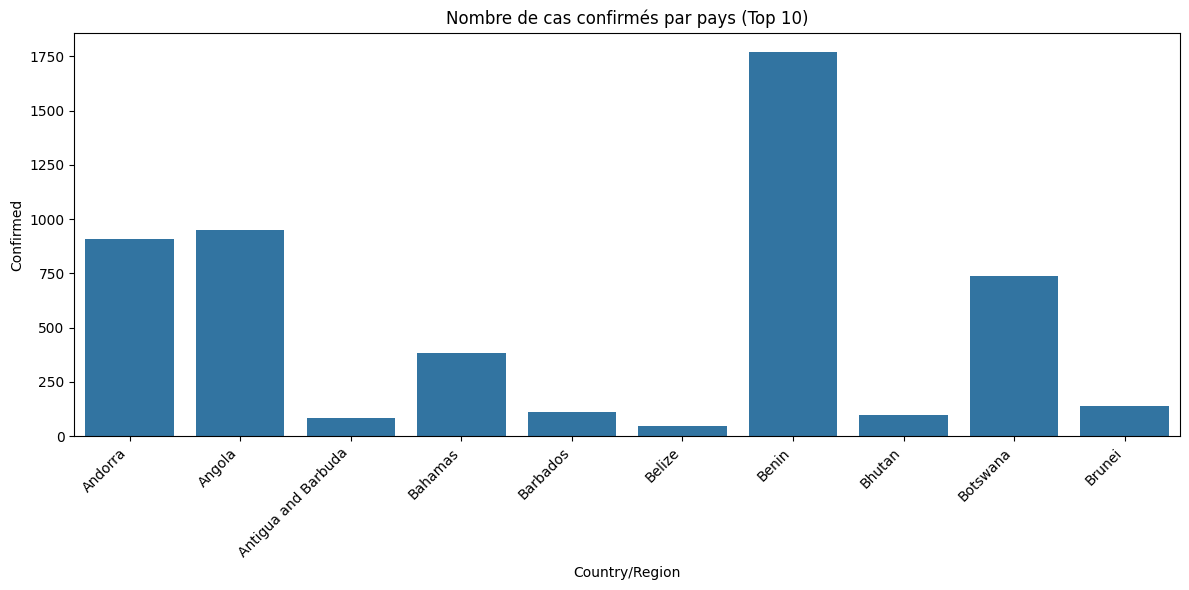

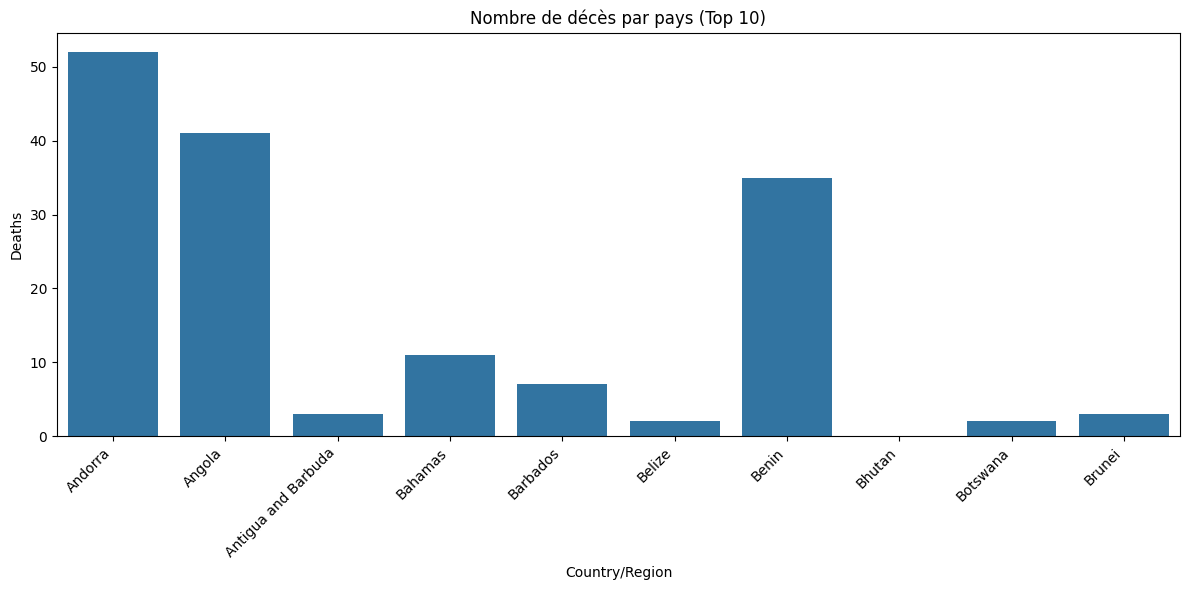

In [2]:
# ====== COVID-19 ANALYSE ======

# Import des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Nettoyage des données
def nettoyer_covid():
    df_covid = pd.read_csv('covid19.csv')
    df_clean = df_covid.dropna()
    
    colonnes_numeriques = ['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases']
    for col in colonnes_numeriques:
        df_clean[col] = df_clean[col].clip(lower=0)
    
    df_clean = df_clean.drop_duplicates()
    
    for col in colonnes_numeriques:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        df_clean = df_clean[~((df_clean[col] < (Q1 - 1.5 * IQR)) | (df_clean[col] > (Q3 + 1.5 * IQR)))]
    
    return df_clean

# Appliquer le nettoyage
df_covid_clean = nettoyer_covid()

# Afficher les informations sur les données
print("Nombre de lignes avant nettoyage:", len(pd.read_csv('covid19.csv')))
print("Nombre de lignes après nettoyage:", len(df_covid_clean))

# Visualisation des données
# Cas confirmés
plt.figure(figsize=(12, 6))
sns.barplot(data=df_covid_clean.head(10), x='Country/Region', y='Confirmed')
plt.xticks(rotation=45, ha='right')
plt.title('Nombre de cas confirmés par pays (Top 10)')
plt.tight_layout()
plt.show()

# Décès
plt.figure(figsize=(12, 6))
sns.barplot(data=df_covid_clean.head(10), x='Country/Region', y='Deaths')
plt.xticks(rotation=45, ha='right')
plt.title('Nombre de décès par pays (Top 10)')
plt.tight_layout()
plt.show()

# Sauvegarder les données nettoyées
df_covid_clean.to_csv('covid19_clean.csv', index=False)

Aperçu des données :
  Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0    Afghanistan      36263    1269      25198    9796        106          10   
1        Albania       4880     144       2745    1991        117           6   
2        Algeria      27973    1163      18837    7973        616           8   
3        Andorra        907      52        803      52         10           0   
4         Angola        950      41        242     667         18           1   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0             18                3.50                  69.49   
1             63                2.95                  56.25   
2            749                4.16                  67.34   
3              0                5.73                  88.53   
4              0                4.32                  25.47   

   Deaths / 100 Recovered  Confirmed last week  1 week change  \
0                    5.04                35526  

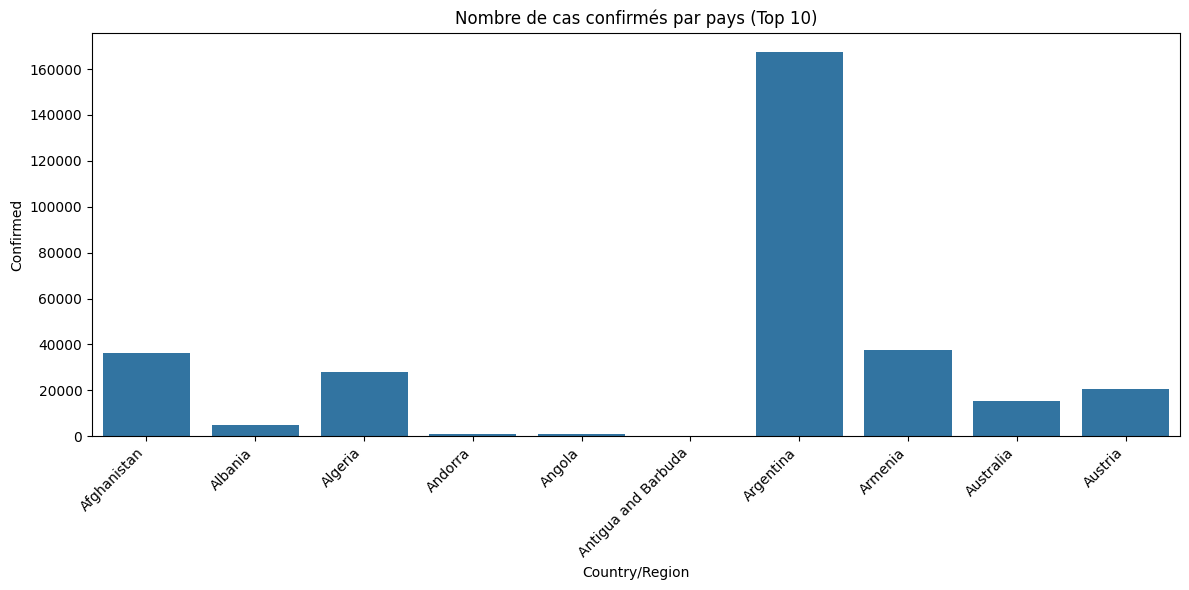

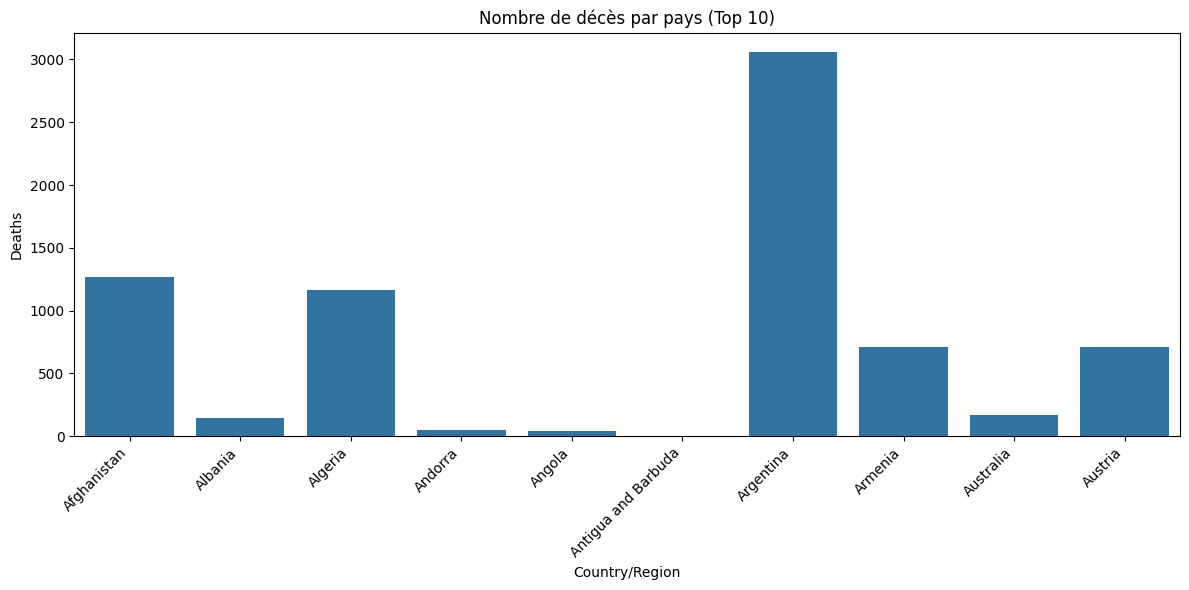

In [4]:
# Import des bibliothèques nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lecture du fichier CSV
df = pd.read_csv('covid19.csv')

# Afficher les premières lignes du DataFrame
print("Aperçu des données :")
print(df.head())

# Afficher les informations sur le DataFrame
print("\nInformations sur le dataset :")
print(df.info())

# Créer quelques visualisations de base
plt.figure(figsize=(12, 6))
sns.barplot(data=df.head(10), x='Country/Region', y='Confirmed')
plt.xticks(rotation=45, ha='right')
plt.title('Nombre de cas confirmés par pays (Top 10)')
plt.tight_layout()
plt.show()

# Visualisation des décès
plt.figure(figsize=(12, 6))
sns.barplot(data=df.head(10), x='Country/Region', y='Deaths')
plt.xticks(rotation=45, ha='right')
plt.title('Nombre de décès par pays (Top 10)')
plt.tight_layout()
plt.show()